#IMPORTANTO BIBLIOTECAS NECESSARIAS


In [53]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib.dates  as mdates
import seaborn           as sbn
import statsmodels.api   as sm



from matplotlib.ticker         import FuncFormatter
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller as adf
from sklearn.model_selection   import train_test_split
from statsmodels.tsa.seasonal  import seasonal_decompose


#ANALISANDO A BASE DE DADOS DOS ULTIMOS 10 ANOS(2014-2024) DO SITE DA INVEST

In [54]:
#extraindo a base do github
url = 'https://raw.githubusercontent.com/soareslaio/Tech-Challenge-2-Modelos-Preditivos-IBOVESPA/main/Dados%20Brutos/Dados%20Hist%C3%B3ricos%20-%20Ibovespa.csv'

In [55]:
df_invest_10y = pd.read_csv(url)
df_invest_10y['Último'] *= 1000

In [56]:
#puxando as informações do DataFrame para entendermos inicialmente como está a estrutura(qtd null, dtype e variaveis)
df_invest_10y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      2517 non-null   object 
 1   Último    2517 non-null   float64
 2   Abertura  2517 non-null   float64
 3   Máxima    2517 non-null   float64
 4   Mínima    2517 non-null   float64
 5   Vol.      2516 non-null   object 
 6   Var%      2517 non-null   object 
dtypes: float64(4), object(3)
memory usage: 137.8+ KB


In [57]:
df_invest_10y.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,29.02.2024,129020.0,130.155,130.155,128.669,"12,00M","-0,87%"
1,28.02.2024,130155.0,131.685,131.685,129.771,"9,05M","-1,16%"
2,27.02.2024,131689.0,129.613,131.696,129.613,"10,05M","1,61%"
3,26.02.2024,129609.0,129.417,129.978,129.077,"7,44M","0,15%"
4,23.02.2024,129419.0,130.240,130.624,129.077,"9,23M","-0,63%"


In [58]:
df_invest_10y.tail()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
2512,08.01.2014,50577.0,50.431,50.793,50.424,"2,92M","0,29%"
2513,07.01.2014,50430.0,50.982,51.478,50.429,"3,34M","-1,07%"
2514,06.01.2014,50974.0,50.980,51.002,50.451,"3,73M","-0,01%"
2515,03.01.2014,50981.0,50.348,50.981,50.269,"7,36M","1,27%"
2516,02.01.2014,50341.0,51.522,51.656,50.246,"3,48M","-2,26%"


In [59]:
# Analisando a estatistica descritiva do nosso DF.
df_invest_10y.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Último,2517.0,85326.0,26845.0,37497.0,57781.0,86610.0,109735.0,134194.0
Abertura,2517.0,85.0,27.0,38.0,58.0,87.0,110.0,134.0
Máxima,2517.0,86.0,27.0,38.0,58.0,88.0,111.0,134.0
Mínima,2517.0,85.0,27.0,37.0,57.0,86.0,108.0,134.0


Analisando a estatistica descritiva podemos observar que o desvio padrão(std) está relativamente alto. Com isso, os ultimos 10 anos refletem uma grande dispersão de dados que pode não ser interessante para o nosso treinamento de máquina.

In [60]:
df_invest_10y = df_invest_10y.rename(columns={'Último':'ult'})

In [61]:
df_invest_10y.sort_values(by='Data',axis=0, ascending = True)

,Data,ult,Abertura,Máxima,Mínima,Vol.,Var%
2003,01.02.2016,40570.0,40.397,40.570,39.738,"3,77M","0,41%"
1752,01.02.2017,64836.0,64.687,65.594,64.687,"3,31M","0,26%"
1506,01.02.2018,85495.0,84.913,86.028,84.833,"4,21M","0,69%"
1261,01.02.2019,97861.0,97.395,98.044,96.990,"4,43M","0,48%"
766,01.02.2021,117518.0,115.093,117.862,115.093,"8,72M","2,13%"
...,...,...,...,...,...,...,...
1566,31.10.2017,74308.0,74.798,75.142,74.145,"3,66M","-0,66%"
1320,31.10.2018,87424.0,86.889,88.028,86.213,"6,07M","0,62%"
1073,31.10.2019,107220.0,108.403,108.403,106.356,"5,38M","-1,10%"
330,31.10.2022,116037.0,114.533,116.763,112.113,"21,64M","1,31%"


In [62]:
df_invest_10y.isna().sum()

Data        0
ult         0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

In [63]:
null_rows = df_invest_10y[df_invest_10y.isnull().any(axis=1)]
null_rows

,Data,ult,Abertura,Máxima,Mínima,Vol.,Var%
1998,10.02.2016,40377.0,40.592,40.592,39.96,NaN,"-0,53%"


In [64]:
df_invest_10y = df_invest_10y.dropna()

In [65]:
df_invest_10y.duplicated().sum()

0

In [66]:
df_invest_10y.head()

,Data,ult,Abertura,Máxima,Mínima,Vol.,Var%
0,29.02.2024,129020.0,130.155,130.155,128.669,"12,00M","-0,87%"
1,28.02.2024,130155.0,131.685,131.685,129.771,"9,05M","-1,16%"
2,27.02.2024,131689.0,129.613,131.696,129.613,"10,05M","1,61%"
3,26.02.2024,129609.0,129.417,129.978,129.077,"7,44M","0,15%"
4,23.02.2024,129419.0,130.240,130.624,129.077,"9,23M","-0,63%"


In [67]:
#Selecionando somente as variaveis desejadas para o aprendizado de maquina(ML)
df_invest_10y = df_invest_10y[['Data','ult']]

In [68]:
df_invest_10y.head()

,Data,ult
0,29.02.2024,129020.0
1,28.02.2024,130155.0
2,27.02.2024,131689.0
3,26.02.2024,129609.0
4,23.02.2024,129419.0


In [69]:
#Transformando o dtype da variavel Data para datetime
df_invest_10y['Data'] = pd.to_datetime(df_invest_10y['Data'], format='%d.%m.%Y')

In [70]:
#Validando se as transformações foram bem sucedidas
df_invest_10y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    2516 non-null   datetime64[ns]
 1   ult     2516 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 123.5 KB


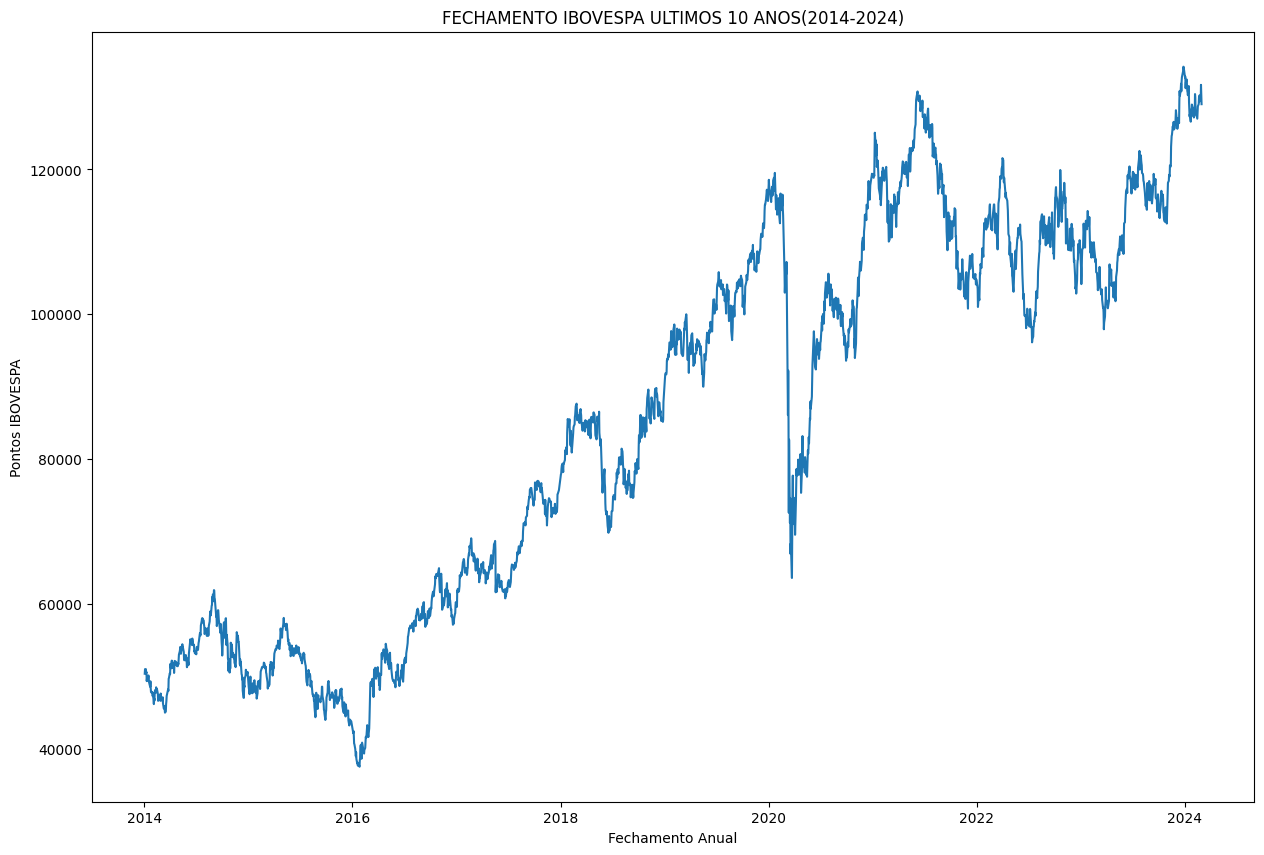

In [71]:
plt.figure(figsize=(15,10))


plt.plot(df_invest_10y['Data'],df_invest_10y['ult'])
plt.title('FECHAMENTO IBOVESPA ULTIMOS 10 ANOS(2014-2024)')
plt.ylabel('Pontos IBOVESPA')
plt.xlabel('Fechamento Anual')

# ax = plt.gca()
# def fomatar_eixo_y_milhar(x, pos):
#     return '{:.3f}'.format(x)
# ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.yaxis.set_major_formatter(FuncFormatter(fomatar_eixo_y_milhar))



plt.show()

Podemos observar uma forte tendencia de baixa no ano de 2016 e no ano de 2020 isso iremos nos aprofundar no documento final deste projeto.

#ANALISANDO OS ULTIMOS 3 ANOS (2021-2024) FECHAMENTO DA BOLSA.

In [72]:
#Importando nosso df do github
url_3y = 'https://raw.githubusercontent.com/soareslaio/Tech-Challenge-2-Modelos-Preditivos-IBOVESPA/main/Dados%20Brutos/2021_01_01_2024_02_29%20-%20Ibovespa.csv'
df_invest_3y = pd.read_csv(url_3y)

In [73]:
df_invest_3y['Último'] *=1000
df_invest_3y.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,29.02.2024,129000.0,130.155,130.155,128.859,"6,11M","-0,89%"
1,28.02.2024,130155.0,131.685,131.685,129.771,"9,05M","-1,16%"
2,27.02.2024,131689.0,129.613,131.696,129.613,"10,05M","1,61%"
3,26.02.2024,129609.0,129.417,129.978,129.077,"7,44M","0,15%"
4,23.02.2024,129419.0,130.240,130.624,129.077,"9,23M","-0,63%"


In [74]:
df_invest_3y.shape

(786, 7)

In [75]:
#Analisando a estrutura do DF
df_invest_3y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      786 non-null    object 
 1   Último    786 non-null    float64
 2   Abertura  786 non-null    float64
 3   Máxima    786 non-null    float64
 4   Mínima    786 non-null    float64
 5   Vol.      786 non-null    object 
 6   Var%      786 non-null    object 
dtypes: float64(4), object(3)
memory usage: 43.1+ KB


In [76]:
#Analisando se existe uma relação com as variaveis
df_invest_3y.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Último,786.0,114381.0,8305.0,96121.0,108454.0,113804.0,119395.0,134194.0
Abertura,786.0,114.0,8.0,96.0,108.0,114.0,119.0,134.0
Máxima,786.0,115.0,8.0,97.0,109.0,115.0,120.0,134.0
Mínima,786.0,113.0,8.0,95.0,107.0,113.0,119.0,134.0


Aqui podemos observar um std melhor com relação ao df de 10 anos, com isso seria mais interessante treinar nosso modelo com base nesse DF.

In [77]:
df_invest_3y.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        0
Var%        0
dtype: int64

In [78]:
df_invest_3y.duplicated().sum()

0

#TRATANDO DADOS

In [79]:
df_invest_3y['Data'] = pd.to_datetime(df_invest_3y['Data'], format='%d.%m.%Y')
df_invest_3y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      786 non-null    datetime64[ns]
 1   Último    786 non-null    float64       
 2   Abertura  786 non-null    float64       
 3   Máxima    786 non-null    float64       
 4   Mínima    786 non-null    float64       
 5   Vol.      786 non-null    object        
 6   Var%      786 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 43.1+ KB


In [80]:
#Renomeando nosso df para facilitar as analises
df_invest_3y = df_invest_3y.rename(columns={'Último':'ult'})

In [81]:
#Selecionando somente as variaveis que iremos utilizar
df_invest_3y = df_invest_3y[['Data','ult']]
df_invest_3y.head()

,Data,ult
0,2024-02-29,129000.0
1,2024-02-28,130155.0
2,2024-02-27,131689.0
3,2024-02-26,129609.0
4,2024-02-23,129419.0


#VISUALIZAÇÕES EXPLORATÓRIAS

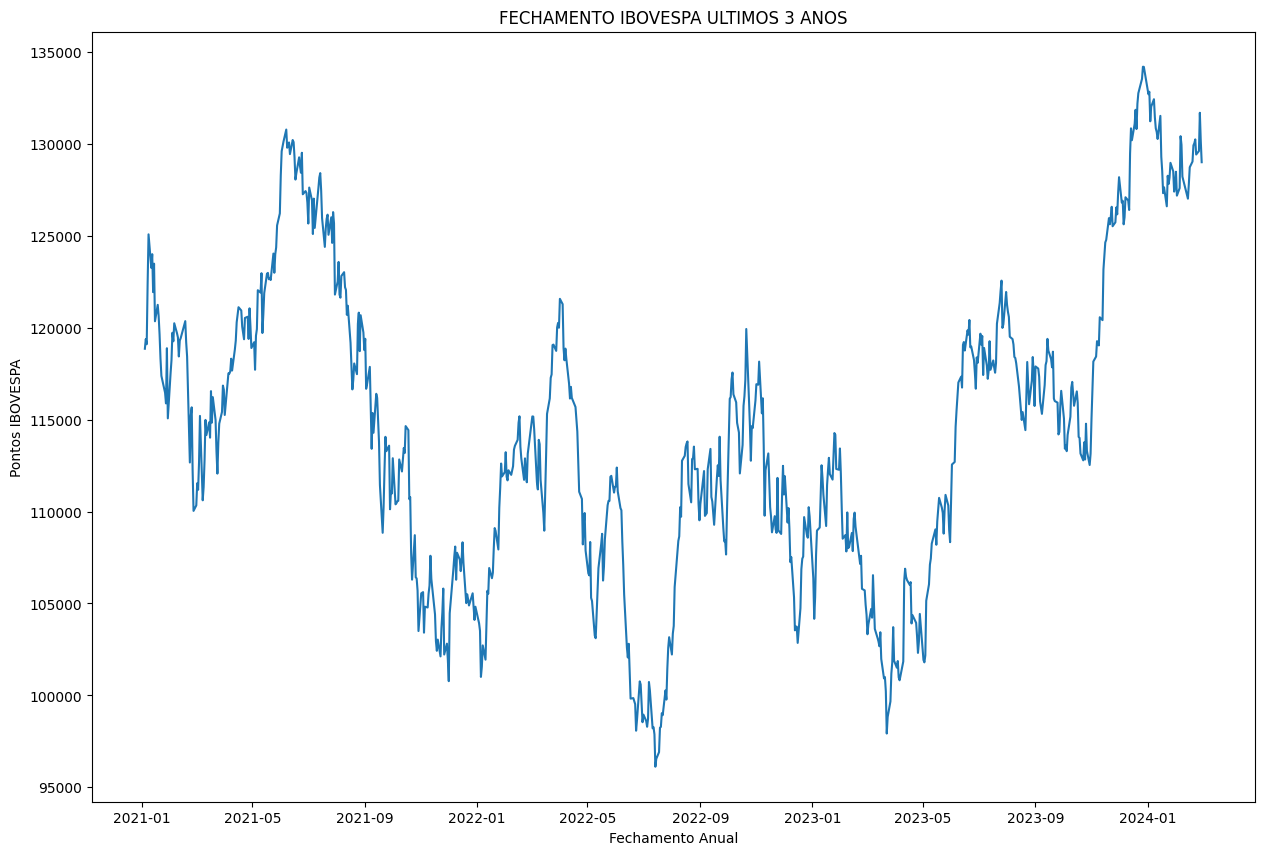

In [82]:

plt.figure(figsize=(15,10))

plt.plot(df_invest_3y['Data'],df_invest_3y['ult'])
plt.title('FECHAMENTO IBOVESPA ULTIMOS 3 ANOS')
plt.ylabel('Pontos IBOVESPA')
plt.xlabel('Fechamento Anual')

# ax = plt.gca()
# def fomatar_eixo_y_milhar(x, pos):
#     return '{:.3f}'.format(x)
# ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.yaxis.set_major_formatter(FuncFormatter(fomatar_eixo_y_milhar))


plt.show()

In [83]:
#Modificando o indice para facilitar as analises
df_invest_3y.set_index('Data', inplace = True)
df_resample = df_invest_3y.resample('M').mean()

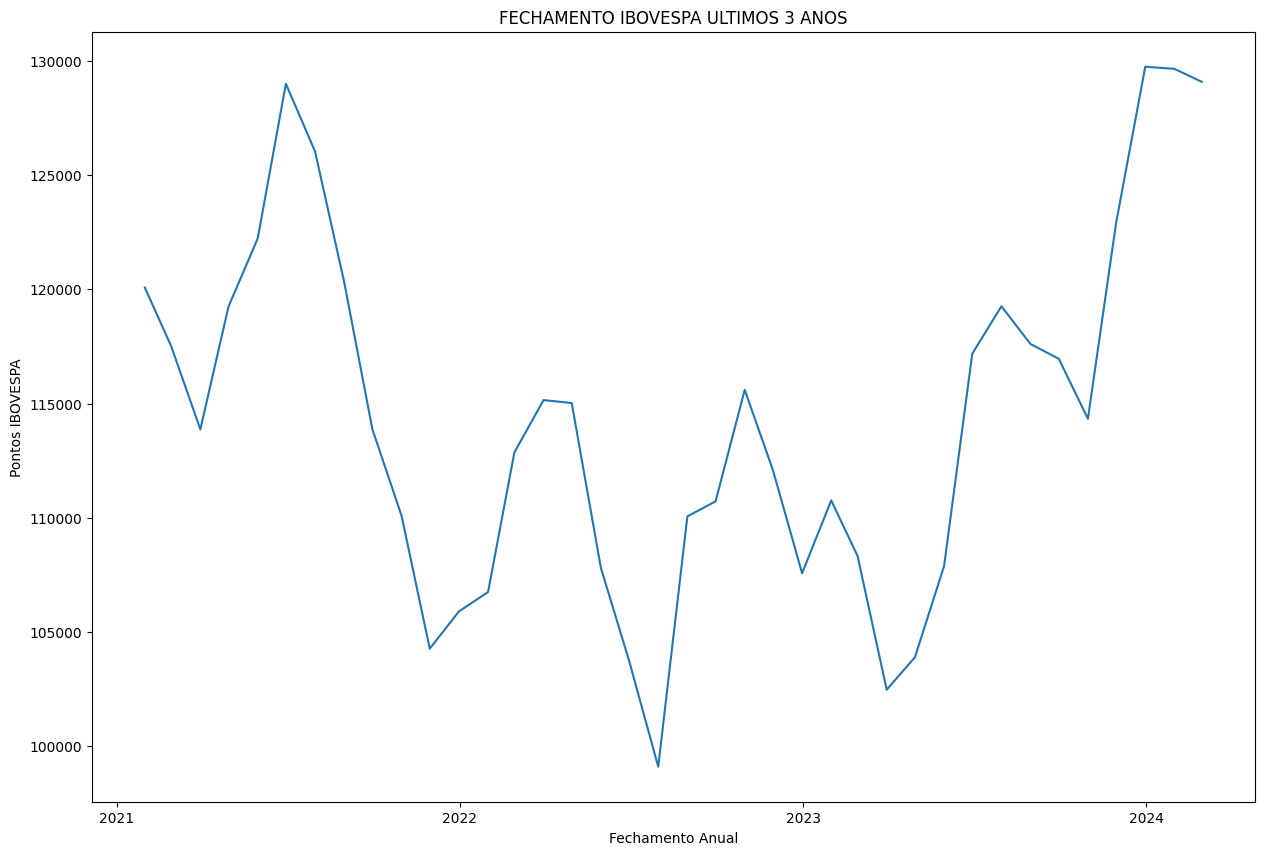

In [84]:
plt.figure(figsize=(15,10))
plt.plot(df_resample.index, df_resample['ult'])
plt.title('FECHAMENTO IBOVESPA ULTIMOS 3 ANOS')
plt.ylabel('Pontos IBOVESPA')
plt.xlabel('Fechamento Anual')


ax = plt.gca()
# def fomatar_eixo_y_milhar(x, pos):
#     return '{:.3f}'.format(x)
ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.yaxis.set_major_formatter(FuncFormatter(fomatar_eixo_y_milhar))

plt.show()

In [85]:
#Calculando a média dos ultimos 3 anos
df_resample_3y = df_invest_3y.resample('Y').mean()

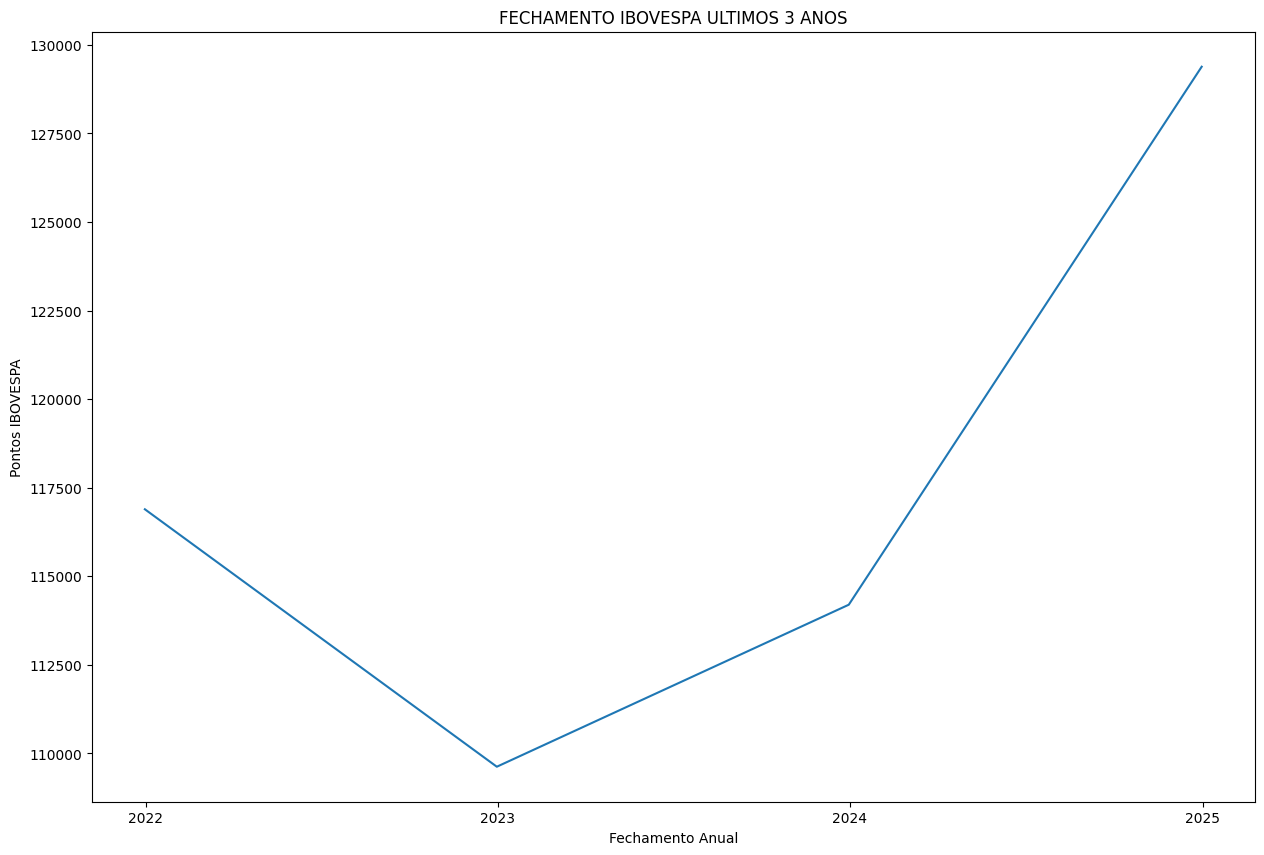

In [86]:
plt.figure(figsize=(15,10))
plt.plot(df_resample_3y.index, df_resample_3y['ult'])
plt.title('FECHAMENTO IBOVESPA ULTIMOS 3 ANOS')
plt.ylabel('Pontos IBOVESPA')
plt.xlabel('Fechamento Anual')

ax = plt.gca()
# def fomatar_eixo_y_milhar(x, pos):
#     return '{:.3f}'.format(x)
ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.yaxis.set_major_formatter(FuncFormatter(fomatar_eixo_y_milhar))


plt.show()

#ANALISANDO SERIE TEMPORAL

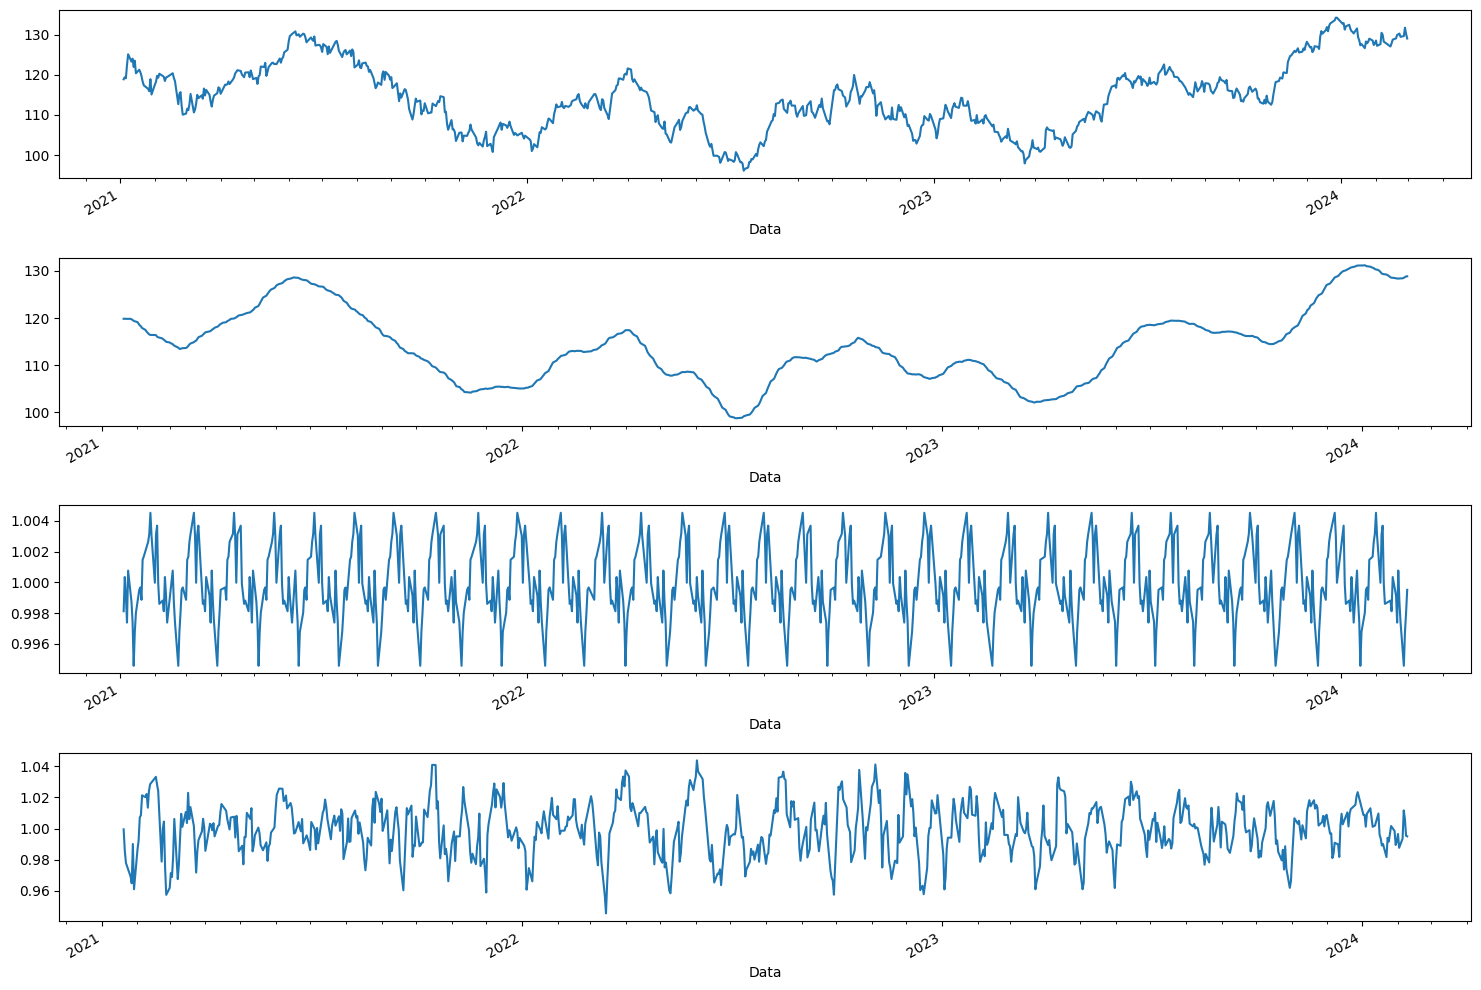

In [40]:
#Analisando a tendencia, sazionalidade e residuos
seasonal_analysis = seasonal_decompose(df_invest_3y, model='multiplpicative', period=25)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,10))
seasonal_analysis.observed.plot(ax=ax1)
seasonal_analysis.trend.plot(ax=ax2)
seasonal_analysis.seasonal.plot(ax=ax3)
seasonal_analysis.resid.plot(ax=ax4)

date_format = mdates.DateFormatter('%Y')
for ax in [ax1, ax2, ax3, ax4]:
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())


plt.tight_layout()

plt.show()

#TESTANDO MODELO ARIMA

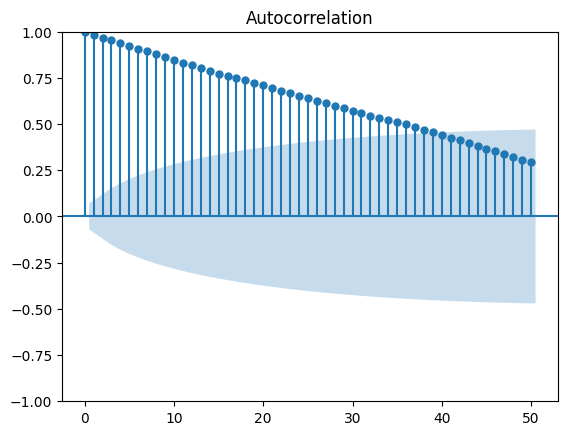

In [41]:
sm.graphics.tsa.plot_acf(df_invest_3y, lags=50)

plt.show()

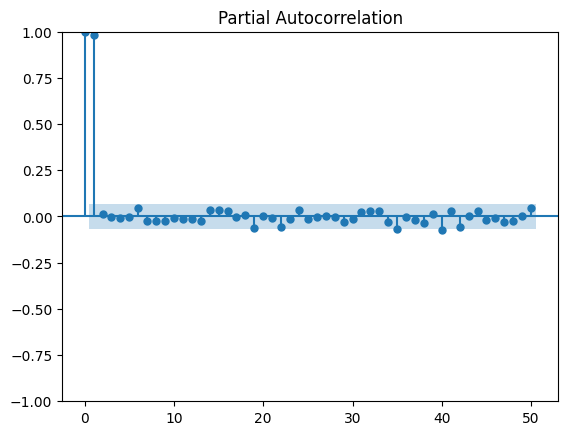

In [42]:
sm.graphics.tsa.plot_pacf(df_invest_3y, lags=50)

plt.show()

ANALISANDO A SERIE TEMPORAL

In [43]:
df_mean = df_invest_3y.rolling(window=12).mean()
df_std = df_invest_3y.rolling(window=12).std()

df_mean,df_std

(                   ult
 Data                  
 2024-02-29         NaN
 2024-02-28         NaN
 2024-02-27         NaN
 2024-02-26         NaN
 2024-02-23         NaN
 ...                ...
 2021-01-08  120.982500
 2021-01-07  121.476000
 2021-01-06  121.619333
 2021-01-05  121.706583
 2021-01-04  121.640667
 
 [786 rows x 1 columns],
                  ult
 Data                
 2024-02-29       NaN
 2024-02-28       NaN
 2024-02-27       NaN
 2024-02-26       NaN
 2024-02-23       NaN
 ...              ...
 2021-01-08  2.713254
 2021-01-07  2.327888
 2021-01-06  2.093960
 2021-01-05  1.962055
 2021-01-04  2.048938
 
 [786 rows x 1 columns])

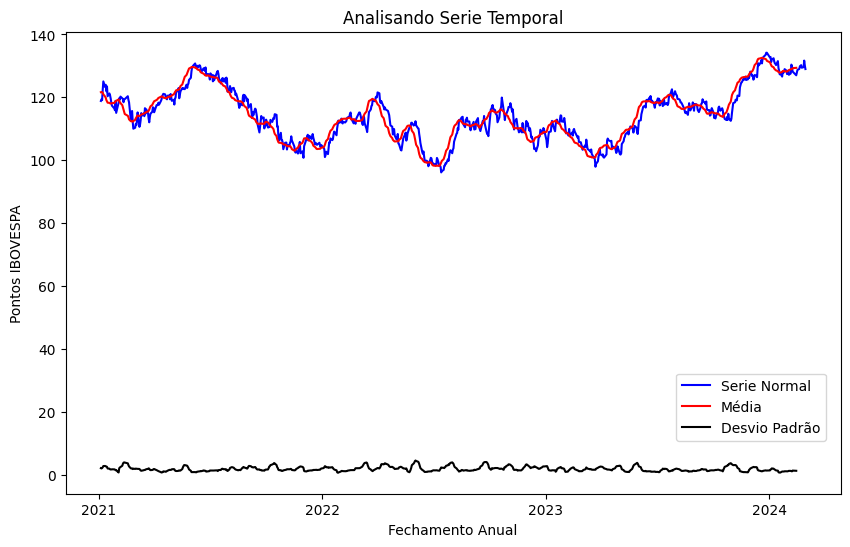

In [44]:
# Aparentemente a serie temporal não é estacionaria devido a distancia bem notoria do desvio padrão

plt.figure(figsize=(10,6))

plt.title('FECHAMENTO IBOVESPA ULTIMOS 3 ANOS')
plt.ylabel('Pontos IBOVESPA')
plt.xlabel('Fechamento Anual')

ax = plt.gca()
# def fomatar_eixo_y_milhar(x, pos):
#     return '{:.3f}'.format(x)
ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.yaxis.set_major_formatter(FuncFormatter(fomatar_eixo_y_milhar))


invest = plt.plot(df_invest_3y, color='blue', label='Serie Normal')
invest_mean = plt.plot(df_mean, color='red', label='Média')
invest_std = plt.plot(df_std, color='black', label='Desvio Padrão')
plt.title('Analisando Serie Temporal')
plt.legend(loc='lower right')

plt.legend(loc='lower right', bbox_to_anchor=(0.99, 0.1))

plt.show(block=False)

In [45]:
#Validando a estacionariedade da serie temporal através do teste de Dickey - Fuller


adf_result = adf(df_invest_3y['ult'])
print(f'ADF: {adf_result[0]}')
print(f'Valor p: {adf_result[1]}')
print('****VALORES CRITICOS****')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')
print('Série não é estacionaria: valor p > 0.05. Valores críticos abaixo do ADF ')

ADF: -2.654189114268432
Valor p: 0.08230650886123503
****VALORES CRITICOS****
   1%: -3.438707722728768
   5%: -2.8652288644673125
   10%: -2.568734303622865
Série não é estacionaria: valor p > 0.05. Valores críticos abaixo do ADF 


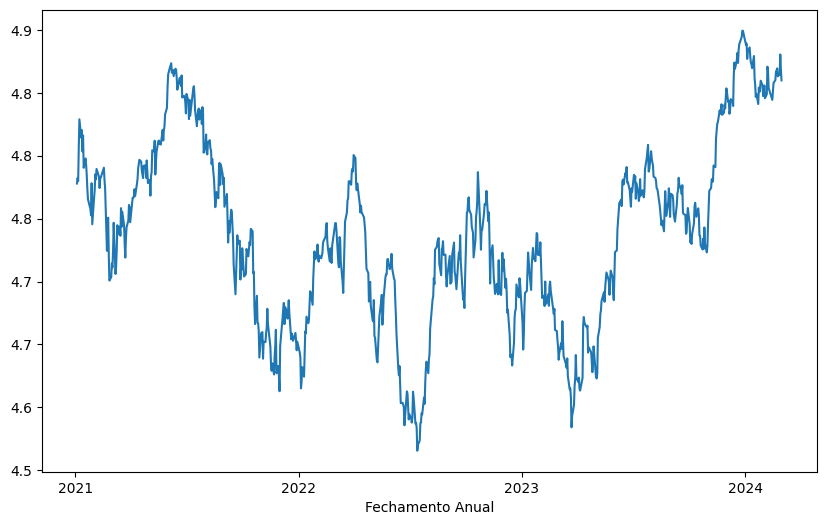

In [46]:
#Fazendo a diferenciação através de logaritmos
indexedDataset_logScale = np.log(df_invest_3y)


plt.figure(figsize=(10,6))
plt.title('')
plt.ylabel('')
plt.xlabel('Fechamento Anual')

ax = plt.gca()
def fomatar_eixo_y_milhar(x, pos):
    return '{:.1f}'.format(x)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.yaxis.set_major_formatter(FuncFormatter(fomatar_eixo_y_milhar))


plt.plot(indexedDataset_logScale)

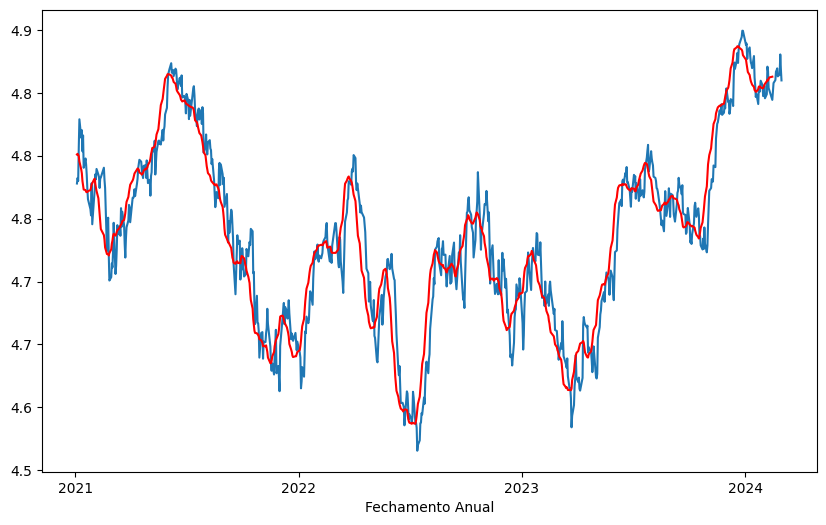

In [47]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()



plt.figure(figsize=(10,6))
plt.title('')
plt.ylabel('')
plt.xlabel('Fechamento Anual')

ax = plt.gca()
def fomatar_eixo_y_milhar(x, pos):
    return '{:.1f}'.format(x)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.yaxis.set_major_formatter(FuncFormatter(fomatar_eixo_y_milhar))


plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [48]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(5)

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(5)

,ult
Data,
2024-02-14,-0.018439
2024-02-09,-0.009903
2024-02-08,-0.007162
2024-02-07,0.007371
2024-02-06,0.010433


In [49]:
def test_stationarity(timeseries):


    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()


    plt.figure(figsize=(10,6))
    invest = plt.plot(timeseries, color='blue', label='Serie Normal')
    invest_mean = plt.plot(movingAverage, color='red', label='Média')
    invest_std = plt.plot(movingSTD, color='black', label='Desvio Padrão')




    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator())


    plt.title('Analisando Serie Temporal Estacionaria')
    plt.ylabel('')
    plt.xlabel('')
    plt.legend(loc='upper right')




    print('Results of Dickey Fuller Test:')
    dftest = adf(timeseries['ult'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    print('Série estacionária, pois o p value < 0.05')
    plt.show(block=False)

Results of Dickey Fuller Test:
Test Statistic                -7.689937e+00
p-value                        1.428152e-11
#Lags Used                     0.000000e+00
Number of Observations Used    7.740000e+02
Critical Value (1%)           -3.438827e+00
Critical Value (5%)           -2.865281e+00
Critical Value (10%)          -2.568762e+00
dtype: float64
Série estacionária, pois o p value < 0.05


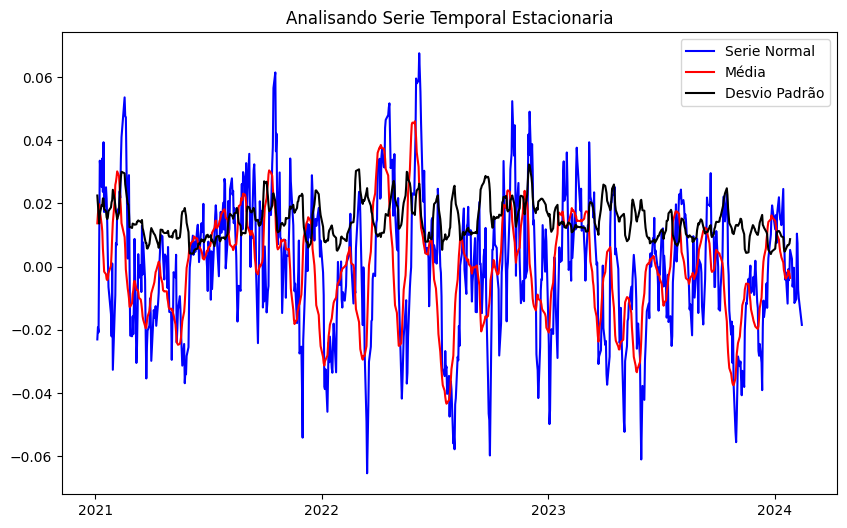

In [50]:
#Validando novamente através do teste de Dickey Fuller(adf) se obtivemos exito ao transformar nossa serie em estacionaria
test_stationarity(datasetLogScaleMinusMovingAverage)

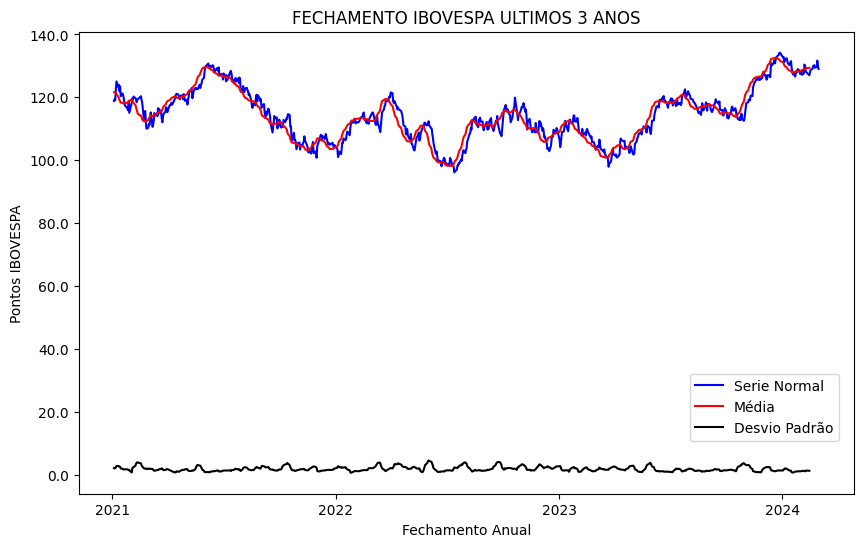

In [51]:
plt.figure(figsize=(10,6))
plt.title('FECHAMENTO IBOVESPA ULTIMOS 3 ANOS')
plt.ylabel('Pontos IBOVESPA')
plt.xlabel('Fechamento Anual')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.yaxis.set_major_formatter(FuncFormatter(fomatar_eixo_y_milhar))

invest = plt.plot(df_invest_3y, color='blue', label='Serie Normal')
invest_mean = plt.plot(df_mean, color='red', label='Média')
invest_std = plt.plot(df_std, color='black', label='Desvio Padrão')


plt.legend(loc='lower right', bbox_to_anchor=(0.99, 0.1))

plt.show(block=False)


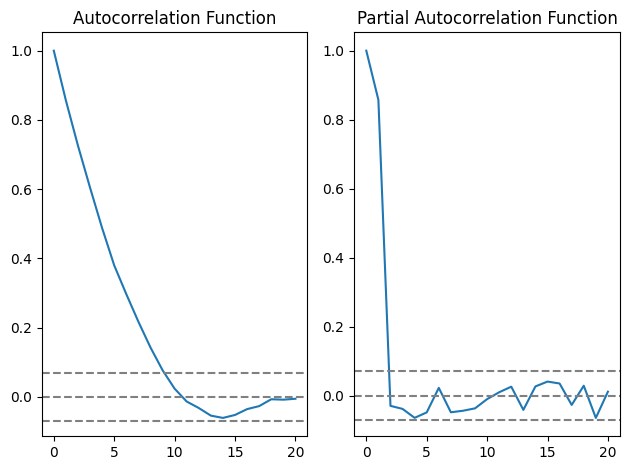

In [52]:
lag_acf = acf(datasetLogScaleMinusMovingAverage, nlags=20)
lag_pacf = pacf(datasetLogScaleMinusMovingAverage, nlags=20, method='ols')

#ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingAverage)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')
plt.ylabel('')
plt.xlabel('')

#PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingAverage)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.ylabel('')
plt.xlabel('')

plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Plotting AR model


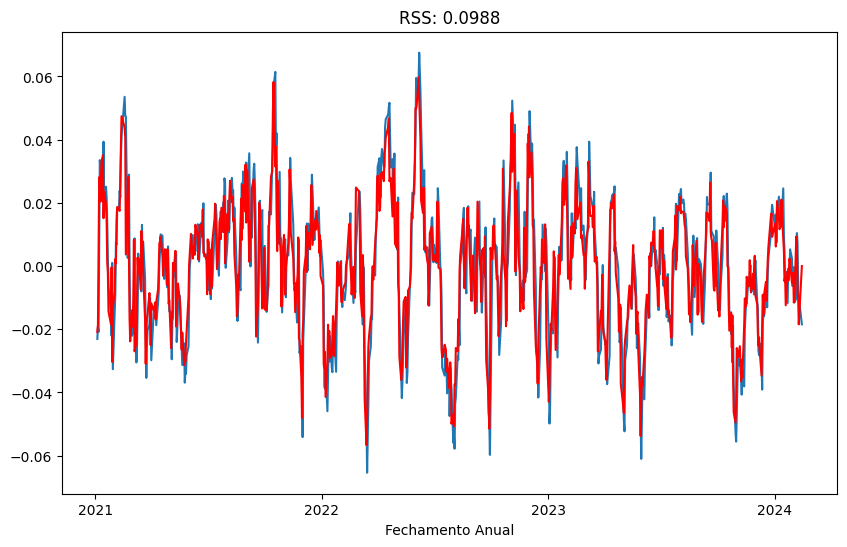

In [148]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(datasetLogScaleMinusMovingAverage, order=(2,1,18))#(p,d,q)
results_AR = model.fit()


plt.figure(figsize=(10,6))
plt.title('')
plt.ylabel('')
plt.xlabel('Fechamento Anual')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.plot(datasetLogScaleMinusMovingAverage)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - datasetLogScaleMinusMovingAverage['ult'])**2))



print('Plotting AR model')

In [152]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

predictions = results_AR.fittedvalues
predictions.index = datasetLogScaleMinusMovingAverage.index
predicted_values = indexedDataset_logScale['ult'].iloc[0] + np.cumsum(predictions)

mape = mean_absolute_error(datasetLogScaleMinusMovingAverage['ult'], predicted_values) * 100
mae = mean_absolute_error(datasetLogScaleMinusMovingAverage['ult'], predicted_values)
mse = mean_squared_error(datasetLogScaleMinusMovingAverage['ult'], predicted_values)
rmse = np.sqrt(mse)
print(f"MAPE: {mape:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MAPE: 408.73
MAE: 4.09
MSE: 16.84
RMSE: 4.10
